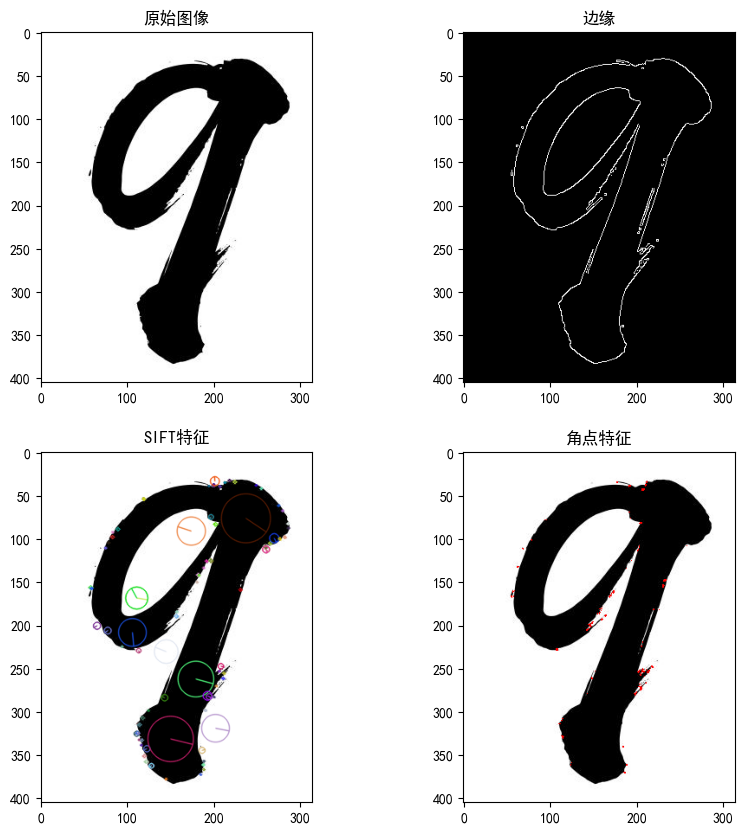

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 读入lena图像
img = cv2.imread('d:/9.png')
# 将BGR图像转换为RGB图像，便于matplotlib显示
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# 将图像转换为灰度图像
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
gray_ori=gray
# 使用Canny边缘检测函数检测图像的边缘
edges = cv2.Canny(gray, 100, 200)

# 创建SIFT对象
sift = cv2.xfeatures2d.SIFT_create()
# 检测图像的特征点
keypoints = sift.detect(gray, None)
# 在图像上绘制特征点
img_sift = cv2.drawKeypoints(img, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# 检测图像的角点
dst = cv2.cornerHarris(gray, 2, 3, 0.04)
# 将角点标记为红色
img_corner = img.copy()
img_corner[dst > 0.01 * dst.max()] = [255, 0, 0]

# 创建一个Matplotlib窗口并显示图像及其各种特征
plt.rcParams['font.family'] = 'SimHei'
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs[0, 0].imshow(img)
axs[0, 0].set_title('原始图像')
axs[0, 1].imshow(edges, cmap='gray')
axs[0, 1].set_title('边缘')
axs[1, 0].imshow(img_sift)
#SIFT的全称是Scale Invariant Feature Transform，尺度不变特征变换。具有旋转不变性、尺度不变性、亮度变化保持不变性，是一种非常稳定的局部特征。
axs[1, 0].set_title('SIFT特征')
axs[1, 1].imshow(img_corner)
axs[1, 1].set_title('角点特征')
plt.show()